(This is information taken directly from the Jupyter Notebook assigned on Google Classroom, just to quickly provide a gist of what the algorithm is about)
# K-means algorithm
--------------

k-means is one of the most popular clustering algorithms, mainly because of its simplicity and ability
to scale to very large datasets.

k-means works on the basis of the square of the euclidean distance, and tries to minimize the
total distance between points assigned to a cluster.

The [algorithm](https://en.wikipedia.org/wiki/K-means_clustering#Algorithms) is as follows:

1. Choose N, the number of expected clusters in your data.
2. Choose N random points from your input data. These are your current centers.
3. For each point,
    1) Find the square of the euclidean distance of the point from the current centers.
    2) Assign that point to the center that is closest to it.
4. Now, every point is part of a cluster.
5. Find the centroid of each cluster. Assign these as your current centers
6. Repeat the above steps until the change in the cluster centers is very small (you can choose what "small" is).

We first import the necessary Python libraries we will be using.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Generating the data and rewriting it in usable form

The same function that was in the assignment notebook has been written down below. I will convert the lists of the respective x and y coordinates into a list of tuples, with each datapoint's complete coordinates (in this context, just x and y) contained in this tuple.

In [82]:
def generate_clusters(num_clusters, sigma, num_points_per_cluster):
    points_xcoord = [] 
    points_ycoord = [] 
    center_list = [] 

    for i in range(num_clusters):
        center_x = np.random.uniform(-8*sigma, 8*sigma) 
        center_y = np.random.uniform(-8*sigma, 8*sigma) 
        center_list.append((center_x, center_y)) 
        
        delta_xs = np.random.normal(0, sigma, num_points_per_cluster) 
        delta_ys = np.random.normal(0, sigma, num_points_per_cluster) 

        for deltax, deltay in zip(delta_xs, delta_ys):
            points_xcoord.append(center_x + deltax)
            points_ycoord.append(center_y + deltay)
    
    return center_list, points_xcoord, points_ycoord 

The following function converts points_xcoord and points_ycoord from the previous example into a set of tuples, each of length = 2

In [83]:
def convert_coordinatelists_to_tuples(x_coords,y_coords):
    """Takes the x_coords and y_coords from the generated data and converts them into tuple format for convenience"""
    datapoints = []
    no_of_datapoints = len(x_coords)
    for i in range(no_of_datapoints): #i is simply an indexing variable
        datapoints.append((x_coords[i],y_coords[i]))
    return datapoints

## Forgy Initialisation

Now that we have our data in the form of tuples, there are multiple ways of choosing k means to begin the iterative process. In other words, there is more than one method for 'initialisation' of the algorithm, one of which is known as 'Forgy', in which a random selection of 'k' datapoints is made from the original, say 'n'. These become our initial means.

Note that the value of 'k' chosen is critical to this whole algorithm, and we will see the drawbacks it carries with later on in this file.

In [84]:
def Forgy_k_initialisation(datapoints,k):
    """Randomly choose k out of n datapoint-tuples as the initial k means
    This initialisation method is called Forgy"""
    no_of_datapoints = len(datapoints)
    k_random_indices = random.sample(range(no_of_datapoints),k)
    k_initial_means = []
    for index in k_random_indices:
        k_initial_means.append(datapoints[index])
    return k_initial_means


The distance between two points is calculated as the square of the standard Euclidean distance between two vectors of size 'n'.

In [85]:
def squared_Euclidean_distance(datapoint_1, datapoint_2):
    """Calculates the squared Euclidean Distance between two tuples"""
    squared_Euclidean_distance = 0
    for i in range(len(datapoint_1)): #i is simply an indexing variable
        squared_Euclidean_distance += (datapoint_1[i]-datapoint_2[i])**2
    return squared_Euclidean_distance

### Step 1 (Assignment): Clustering the points according to the k means

The first step of iteration of the algorithm, is to take each datapoint and assign it to one of 'k' clusters, each of which is associated with one of the 'k' means. This is precisely what the below function carries out.

In [86]:
def assign_datapoints_to_clusters(datapoints,means):
    """Creates a nested list of length k, and classifies each datapoint into one of these k clusters"""
    k = len(means)
    set_of_clusters = [[] for i in range(k)] #i is simply an indexing variable
    for datapoint in datapoints:
        minimum_mean_index = 0
        for mean_index in range(k):
            minimum_mean = means[minimum_mean_index]
            iteration_mean = means[mean_index]
            if squared_Euclidean_distance(datapoint,iteration_mean) < squared_Euclidean_distance(datapoint,minimum_mean):
                minimum_mean_index = mean_index
        (set_of_clusters[minimum_mean_index]).append(datapoint)
    return set_of_clusters

### Step 2 (Update): Forming new clusters based on the latest formed k means

The second step of iteration of the algorithm, is to calculate the centroid of each of the 'k' clusters we get. We end up with a new set of 'k' means, which will be used in the next iteration of this algorithm.

Note that this has been split into two functions, one that is solely meant to explicitly calculate the centroid for one set of points, and another one which does this for all of the 'k' clusters by using the earlier function repeatedly.

In [87]:
def calculate_centroid(cluster):
    """Calculates the centroid, AKA vectorial mean of all datapoints in a cluster"""
    dimension_of_data = len(cluster[0])
    centroid = []
    for i in range(dimension_of_data): #i is an indexing variable for the components in a vector in the data's space
        ith_component = 0
        for datapoint in cluster:
            ith_component += datapoint[i]
        centroid.append(ith_component/len(cluster))
    return tuple(centroid)

def calculate_centroids(set_of_clusters):
    """Returns a list of means given a set of clusters"""
    list_of_centroids = []
    for cluster in set_of_clusters:
        list_of_centroids.append(calculate_centroid(cluster))
    return list_of_centroids

# The complete Clustering Algorithm: 

Now that we have all of the functions we require to carry out one iteration of the algorithm, all that is left is to put them together. The below function carries out one iteration of this algorithm.

In [88]:
def one_kmeans_iteration(datapoints,means):
    """Performs one complete iteration of the K-means clustering algorithm"""
    set_of_clusters = assign_datapoints_to_clusters(datapoints,means)
    new_means = calculate_centroids(set_of_clusters)
    return new_means

The next function, takes the previous function that was meant to carry out one single iteration, and does it repetitively until the 'k' means evolve until there is no difference between a newly formed cluster and the corresponding cluster formed in the last iteration.

Since we were interested in getting a list of k-means in order to be able to plot the time evolution of the 'k' means in the algorithm, this function simply returns a 'time-series' of all the k-means that we get when this algorithm is run iteratively from initialisation all the way up to termination.

In [89]:
def find_kmeans_evolution(datapoints,number_of_clusters):
    """Repetitively iterates the Clustering Algorithm till convergence, and returns an ordered list of the list of k-means that have appeared over the performed iterations"""
    all_sets_of_means = []
    initialised_means = Forgy_k_initialisation(datapoints,number_of_clusters) 
    all_sets_of_means.append(initialised_means)
    initial_clusters = assign_datapoints_to_clusters(datapoints,initialised_means)
    old_means = calculate_centroids(initial_clusters)
    all_sets_of_means.append(old_means)
    set_of_clusters = assign_datapoints_to_clusters(datapoints,old_means)
    new_means = calculate_centroids(set_of_clusters)
    while old_means!=new_means:
        all_sets_of_means.append(new_means)
        old_means = new_means
        set_of_clusters = assign_datapoints_to_clusters(datapoints,old_means)
        new_means = calculate_centroids(set_of_clusters)
    return all_sets_of_means

### Plotting and saving this data of the k means against the datapoints, frame-wise.

Just for the sake of completeness, I've included the (slightly modified) function that was provided in the original notebook for the problem statement, right below. This function takes in one set of k-means, and the datapoints, constructs a scatter plot and saves it locally on the User's Computer.

In [90]:
def plot_and_show_data(x_coords, y_coords, means):
    """Produces a scatter plot of the data in a single frame"""
    plt.scatter(x_coords, y_coords, color='k', s=0.5)
    for mean in means:
        plt.scatter(mean[0], mean[1])
    plt.show()

# Trial Run of the code

A trial code of what the output would look like when this algorithm is run on generated data, when plotted after execution, can be found below.

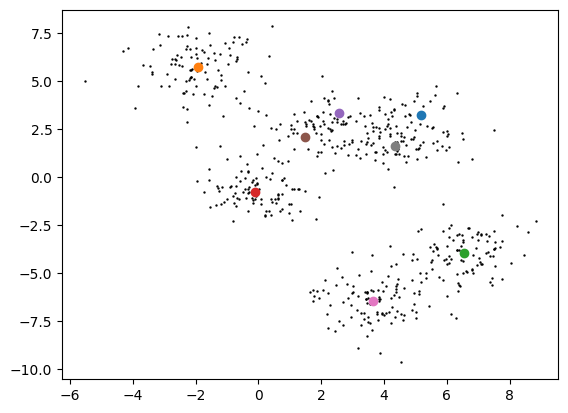

In [91]:
cluster_centres, x_coordinates, y_coordinates = generate_clusters(num_clusters=6, sigma=1, num_points_per_cluster=100)
datapoints = convert_coordinatelists_to_tuples(x_coordinates, y_coordinates)

evolution_of_kmeans = find_kmeans_evolution(datapoints=datapoints,number_of_clusters=8)
# We generate only 6 clusters above, but in this example we try to force 8 means on to these 6 clusters

final_kmeans = evolution_of_kmeans[-1]
plot_and_show_data(x_coordinates, y_coordinates, final_kmeans)

# Limitations of K-Means Clustering

### 1. Different inital (Forgy) means chosen result in different clusters forming:
Right below are two trials of the K-means clustering algorithm that start of with different initial conditions (due to the Forgy Initialisation method) and result in different sets of clusters, which have been illustrated below.

The below four images are listed in the following order:
1. Initial Means for Trial 1 of the Clustering Algorithm
2. Final Means for Trial 1 of the Clustering Algorithm
3. Initial Means for Trial 2 of the Clustering Algorithm
4. Final Means for Trial 2 of the Clustering Algorithm

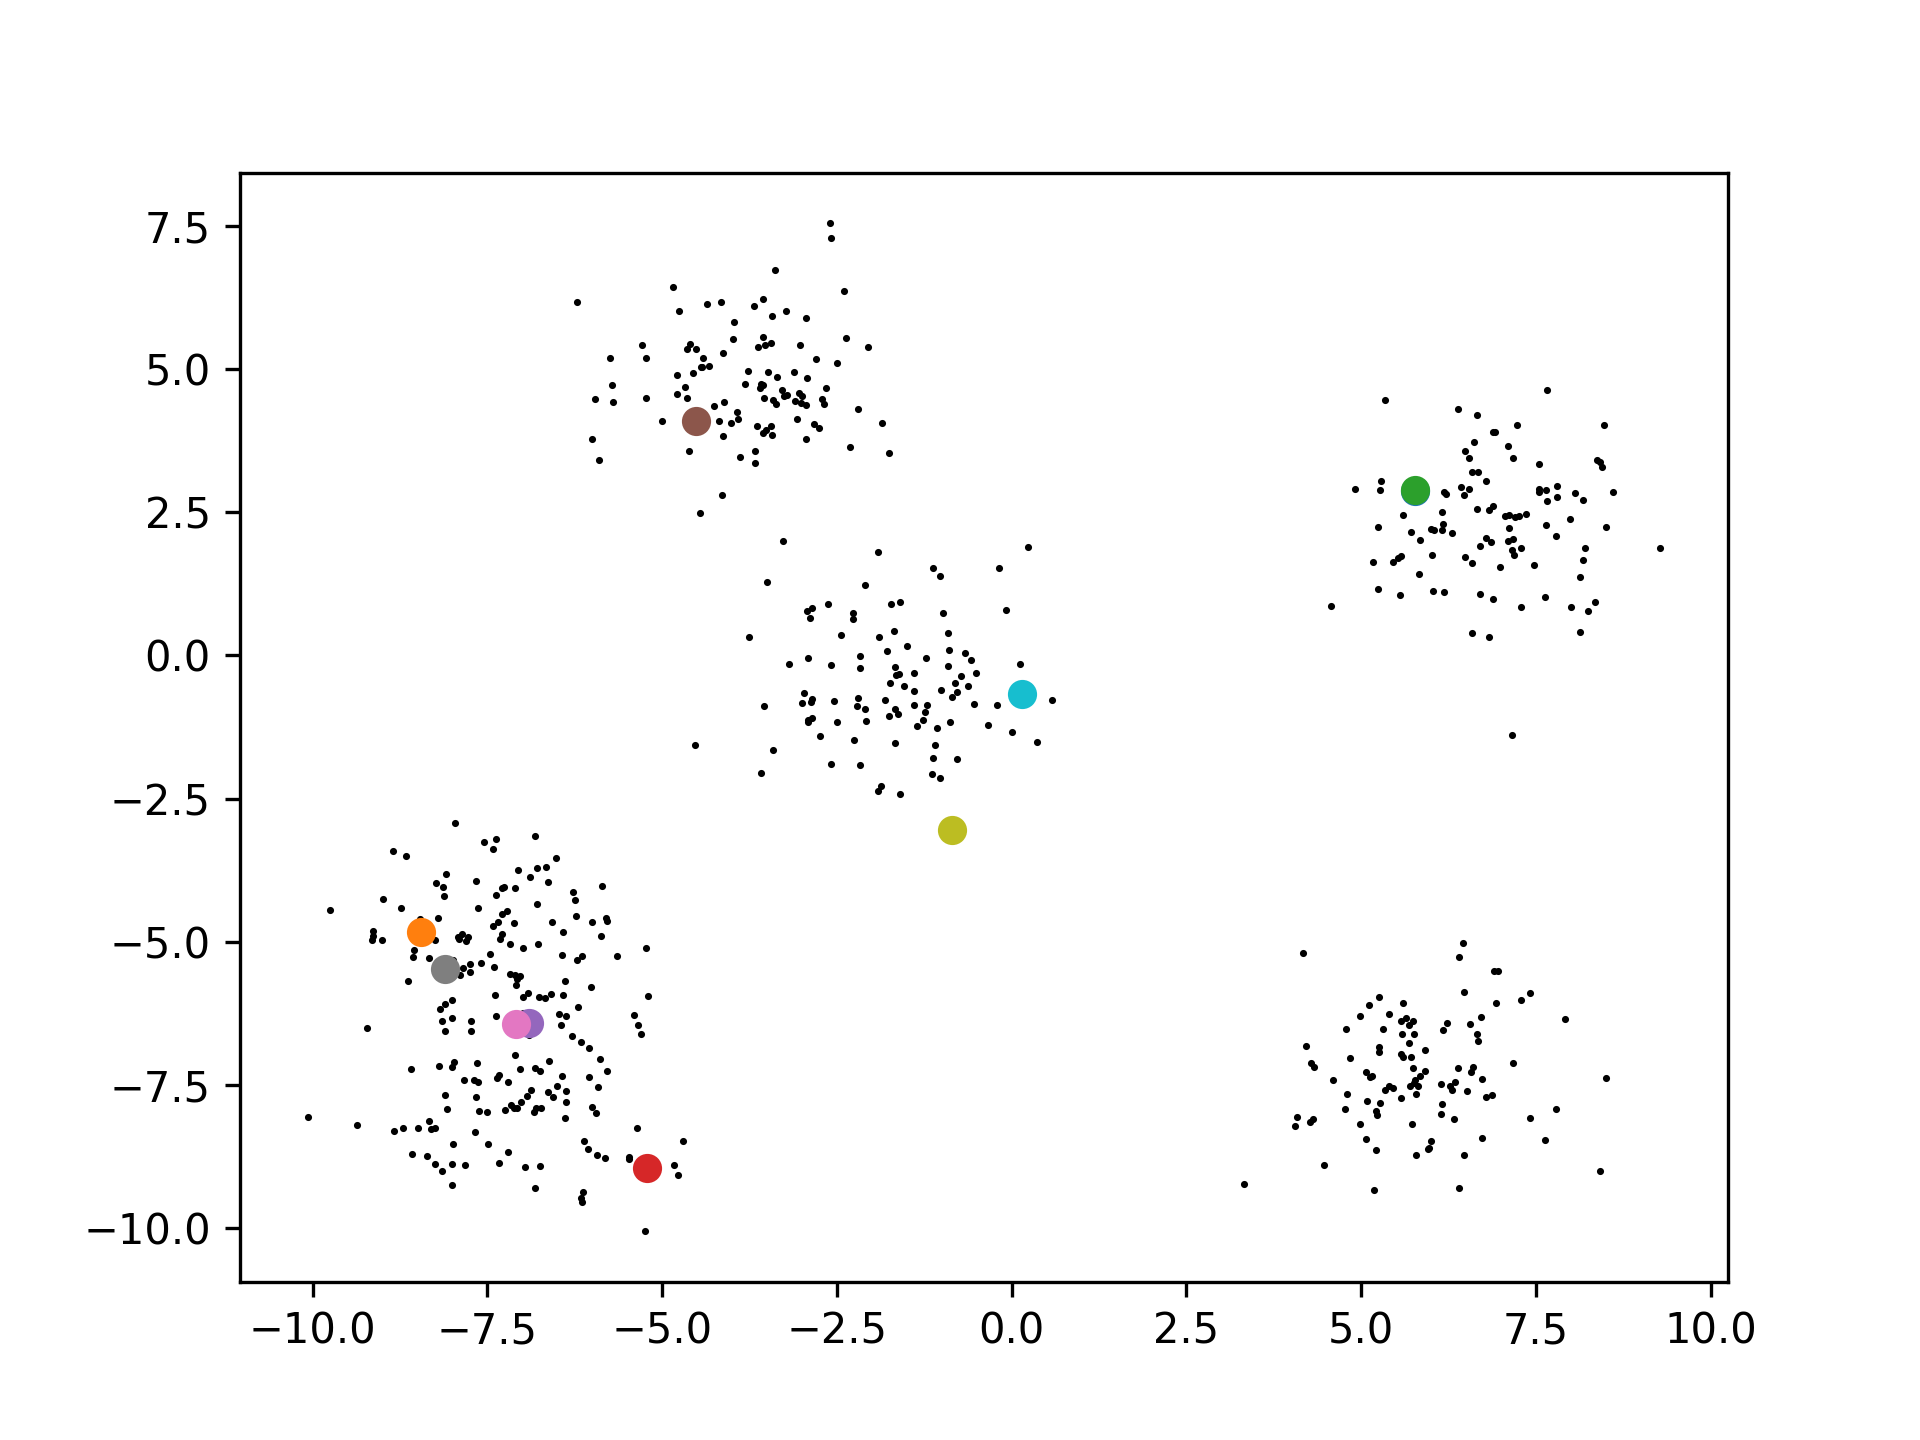

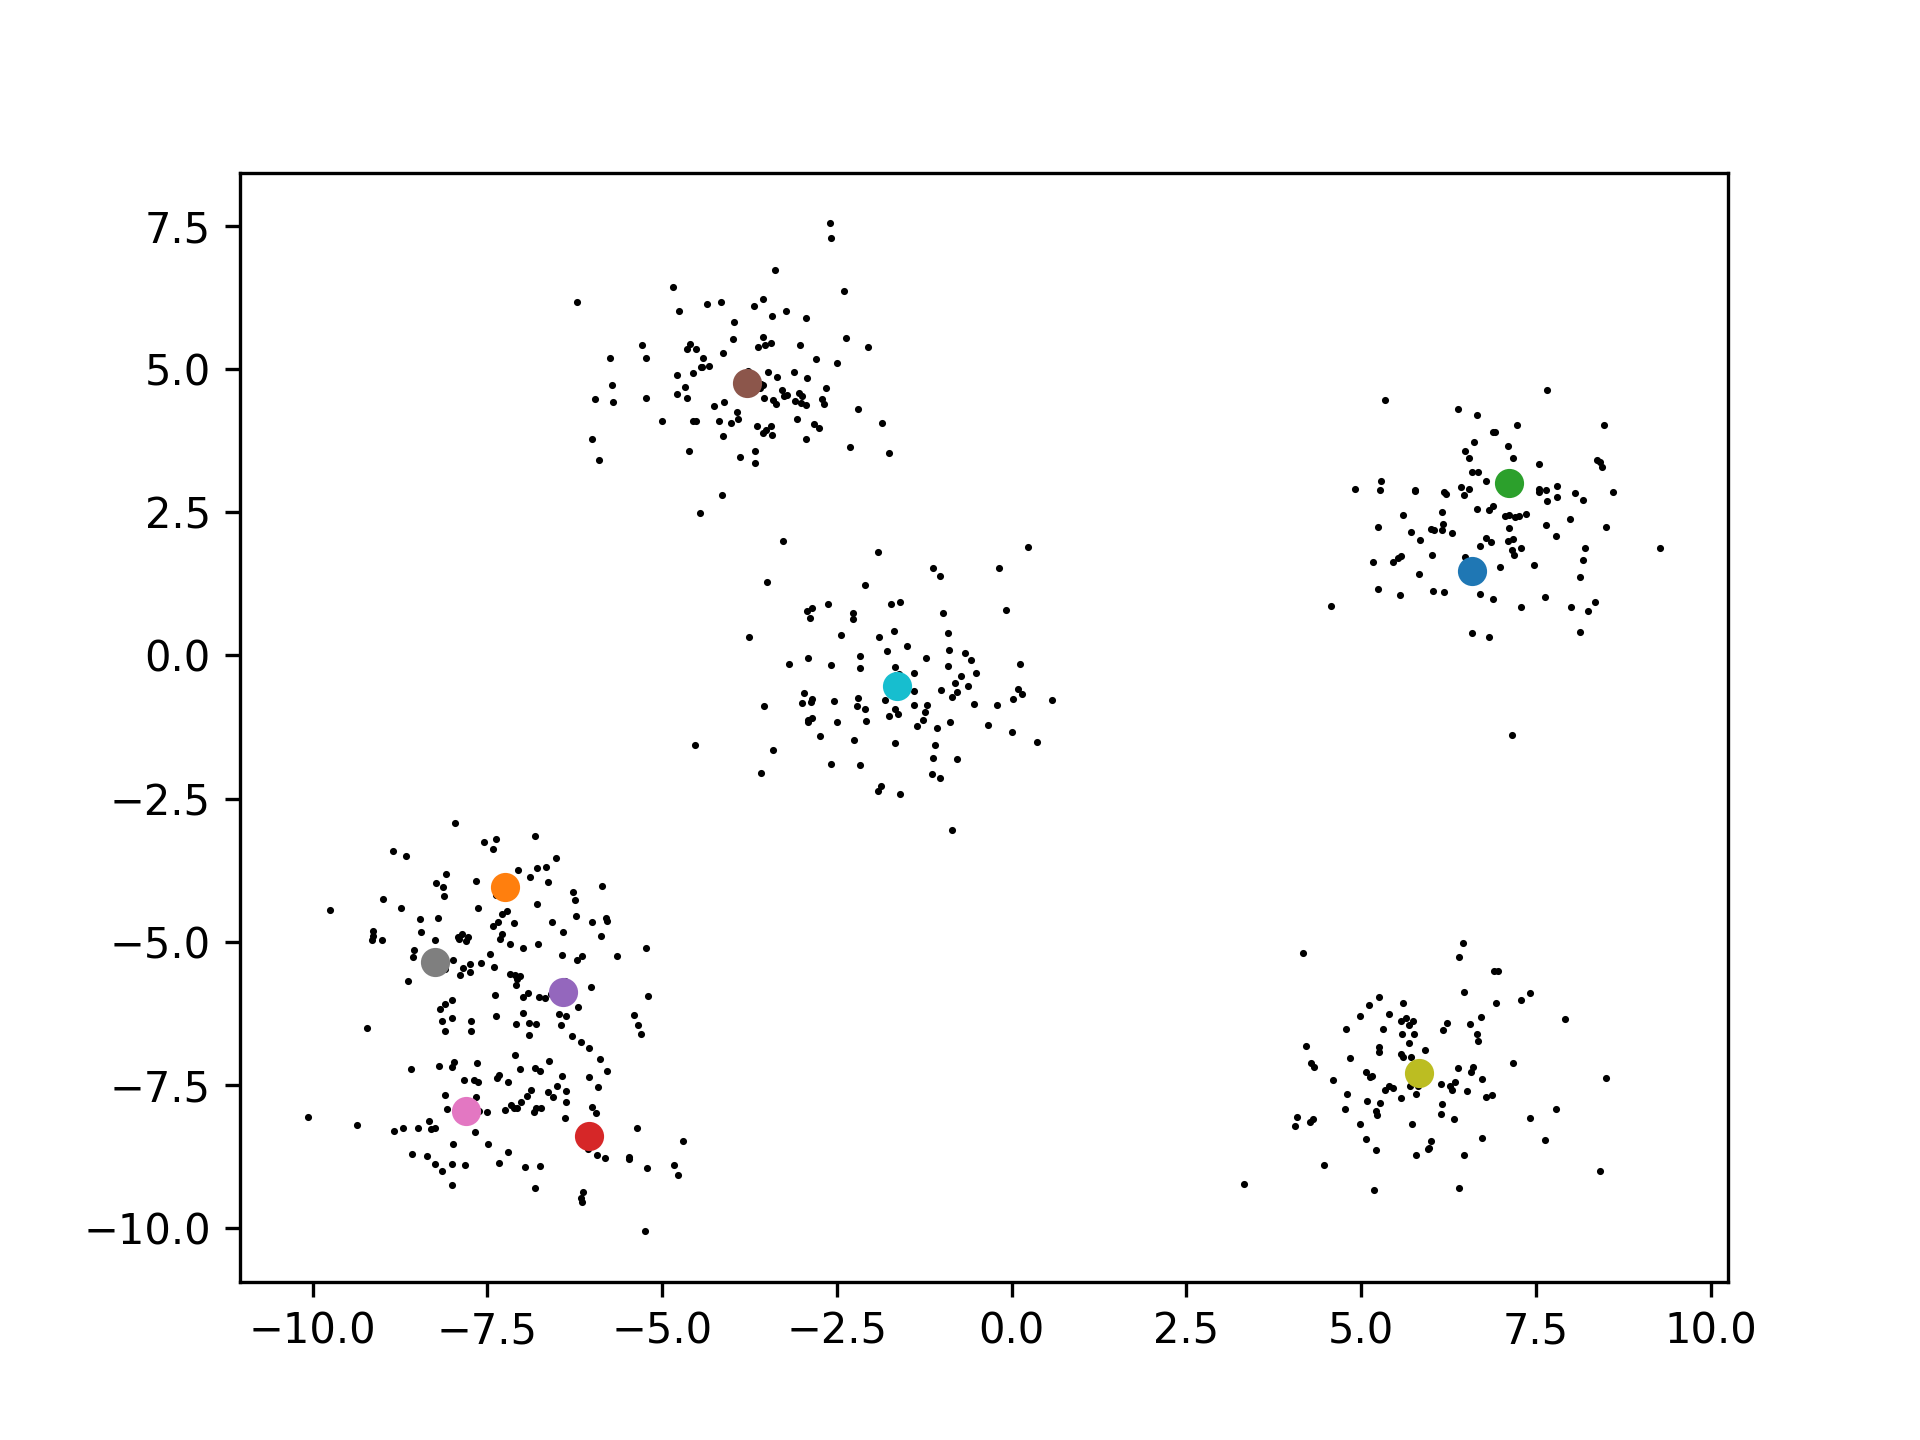

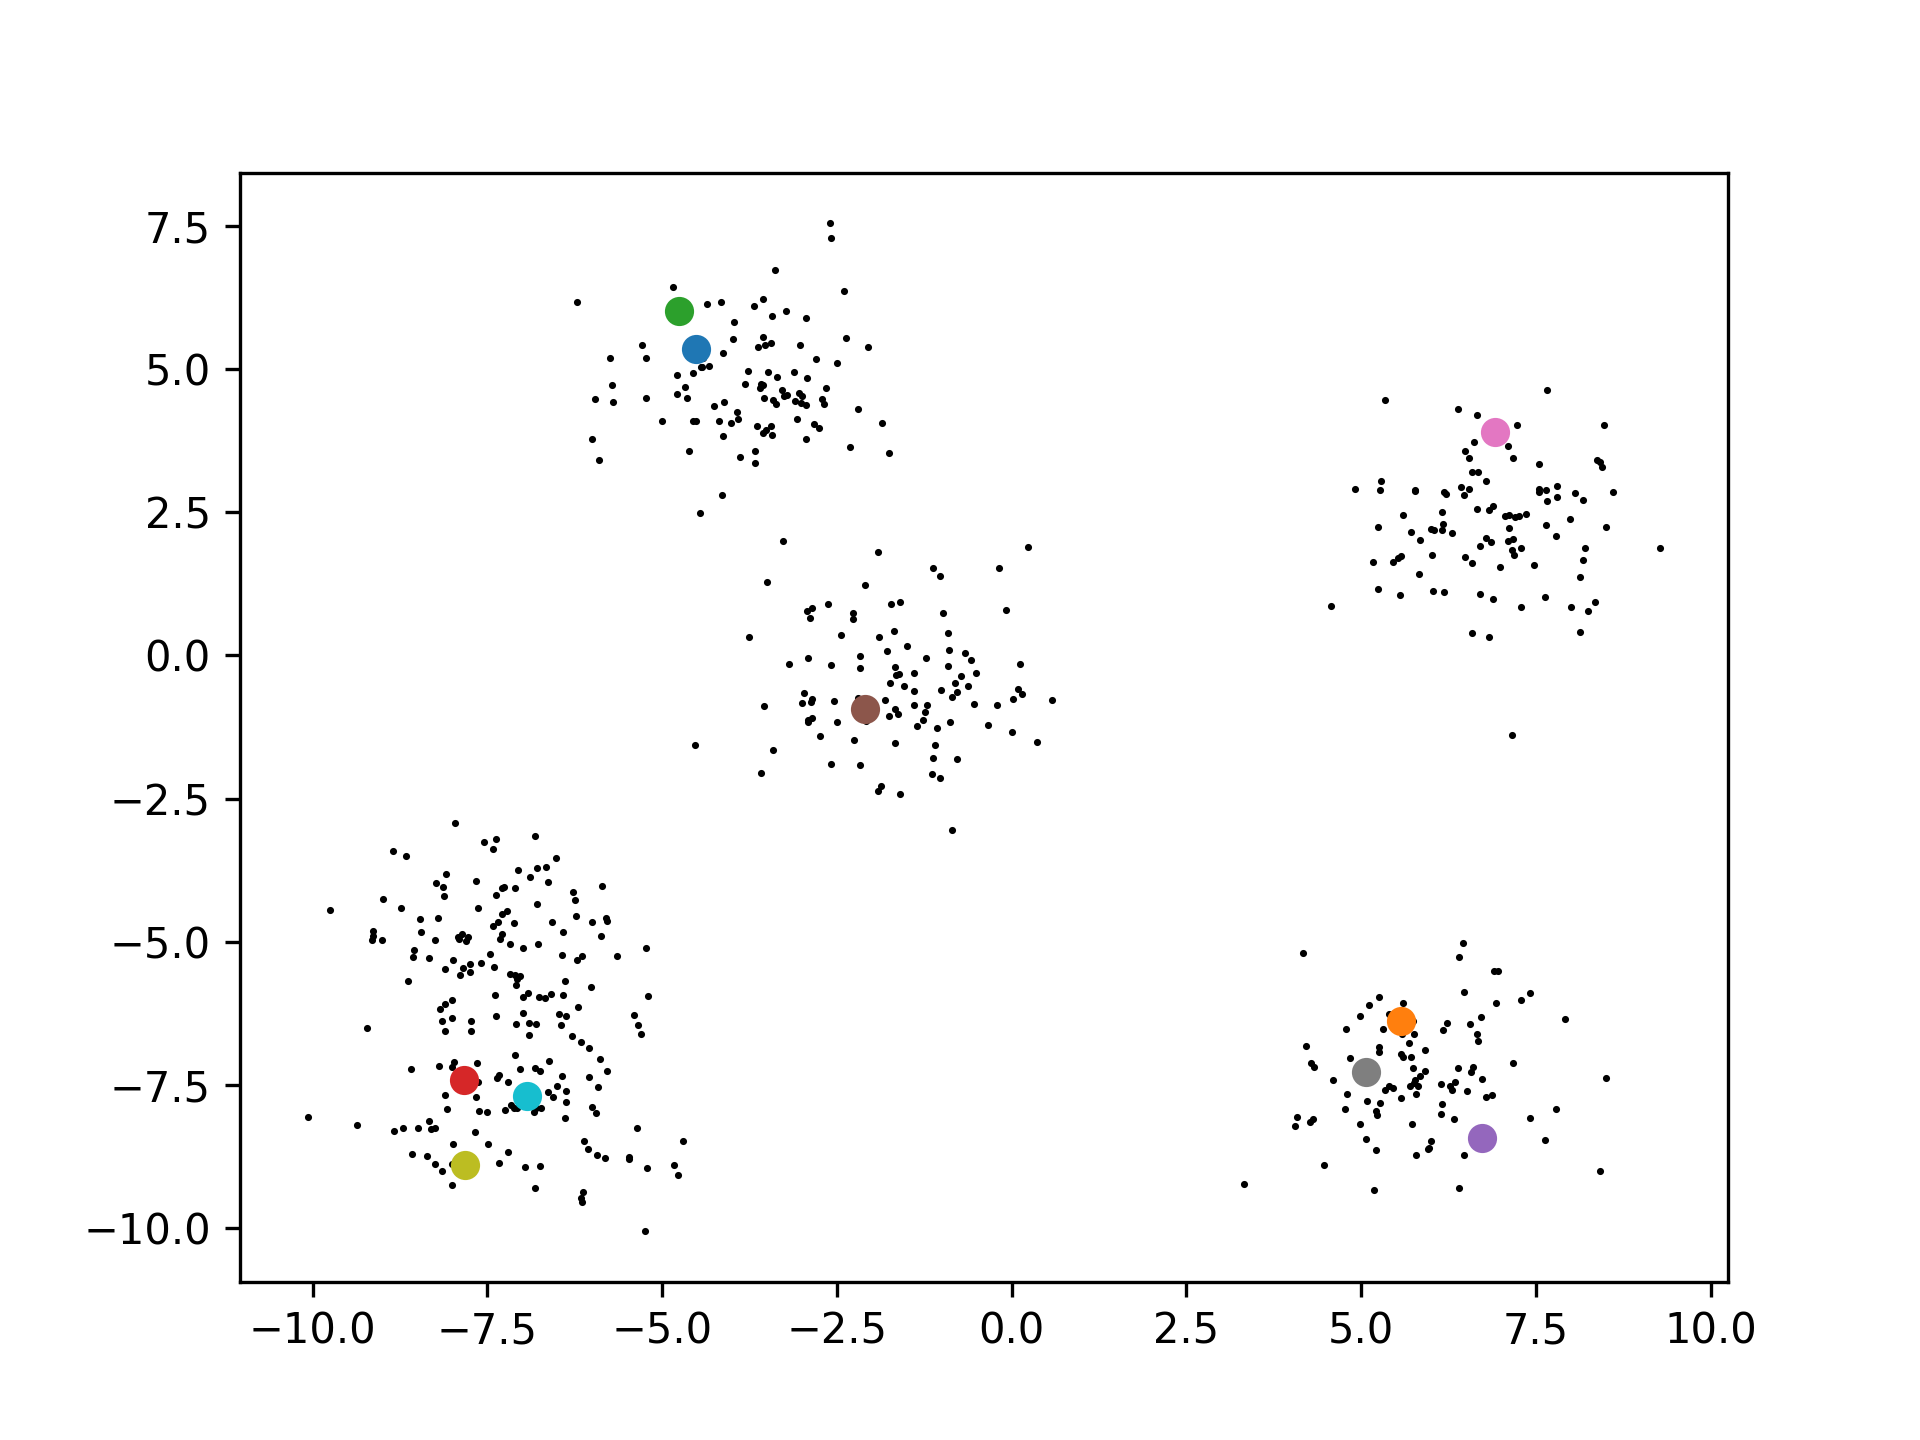

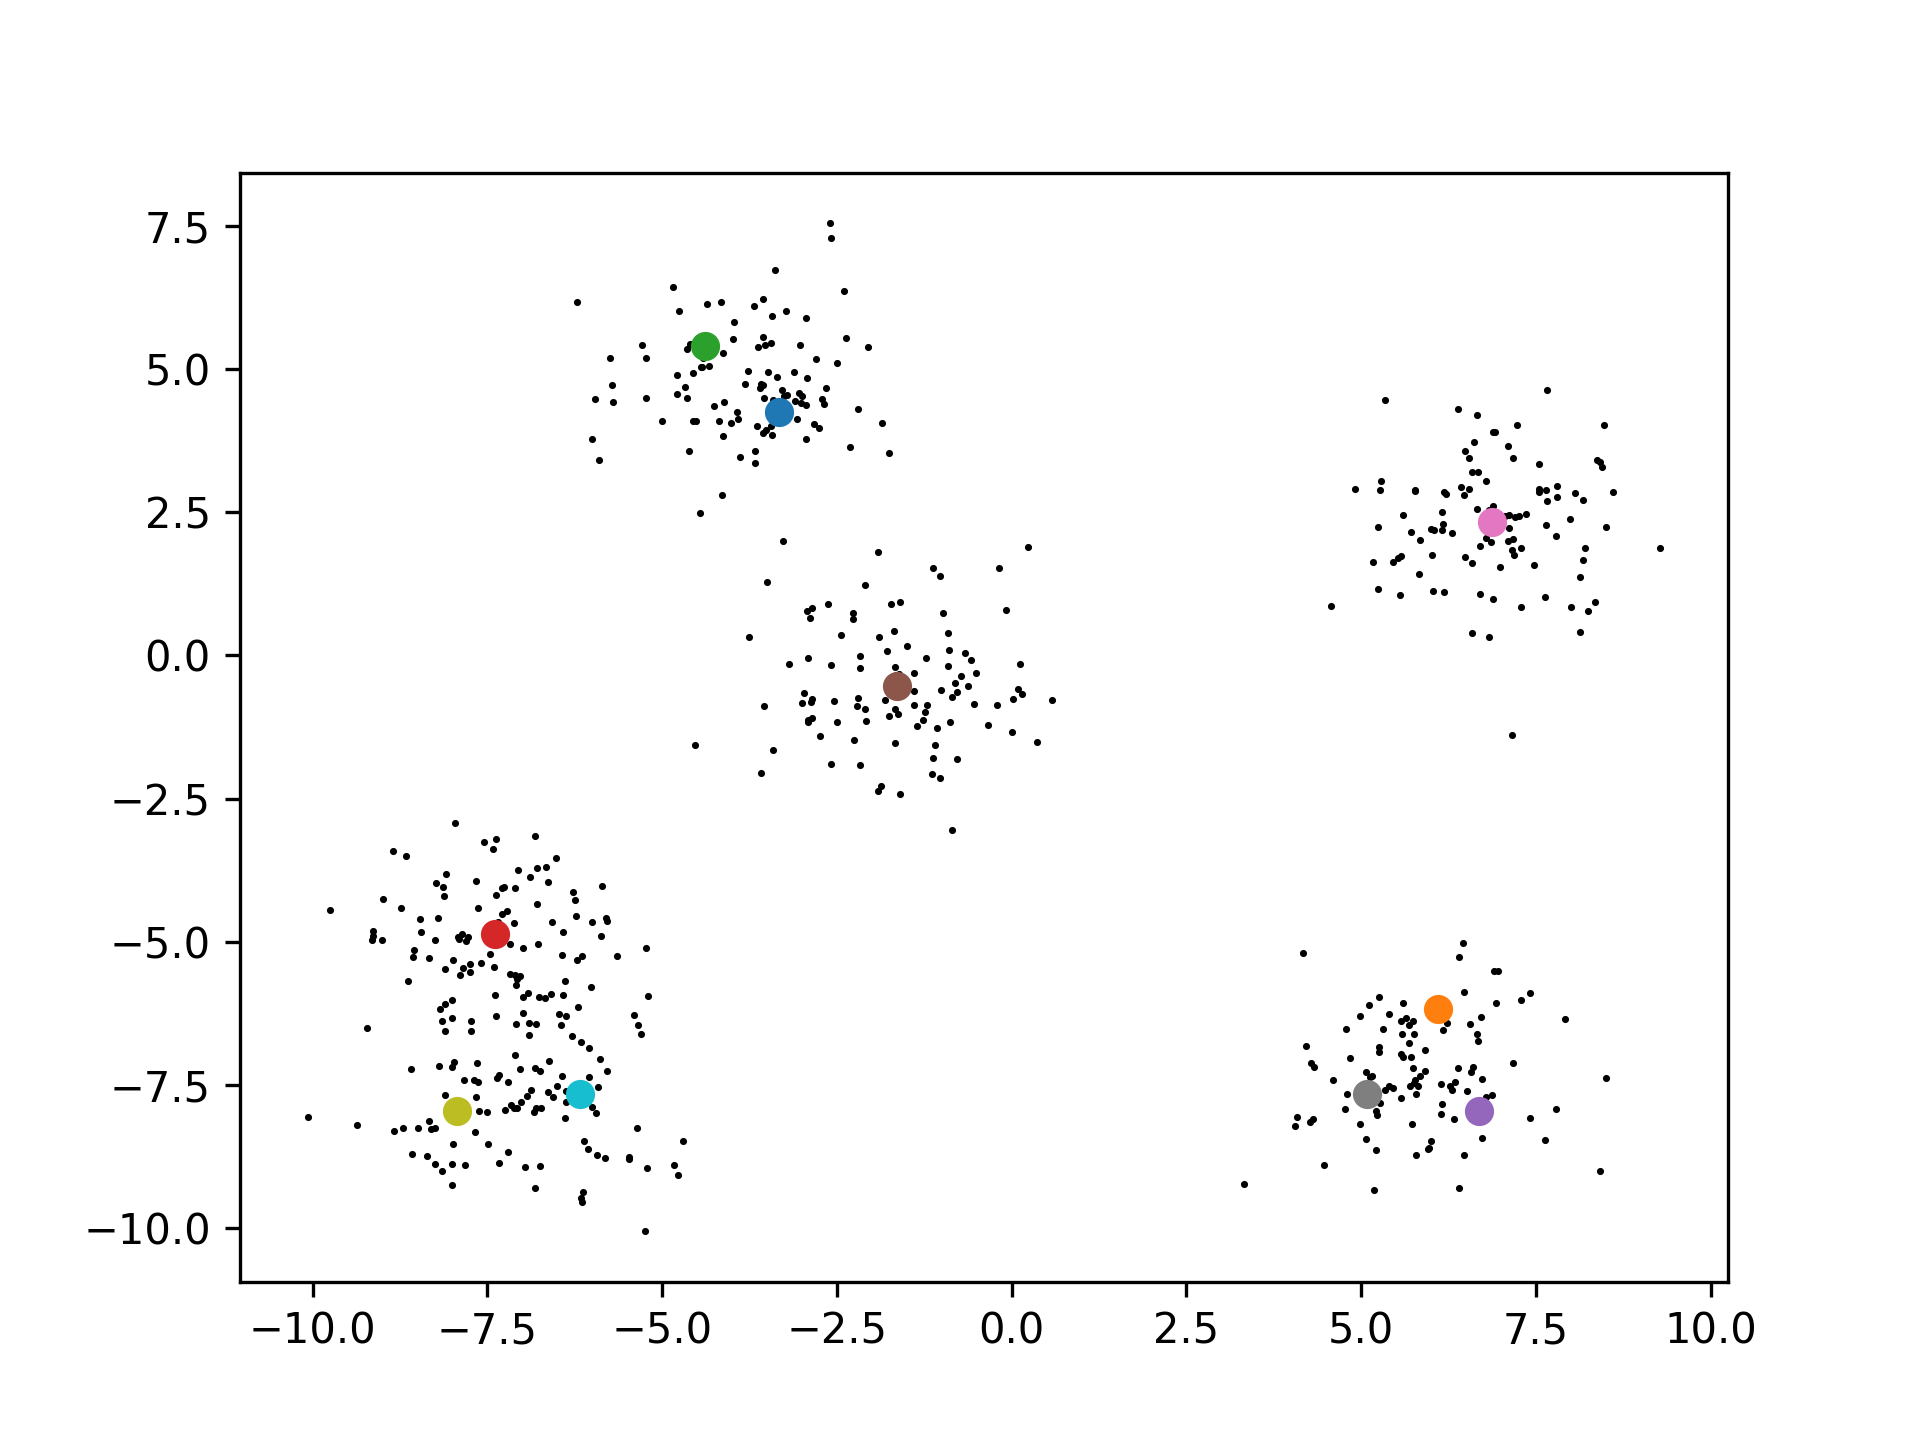

### 2. The number 'k' chosen in advance may not always be the most optimum.

Below are two examples for the results after clustering for a dataset of originally six clusters, with k = 4 and k = 10 respectively. Clearly, the optimal 'k' decides the result of the algorithm.

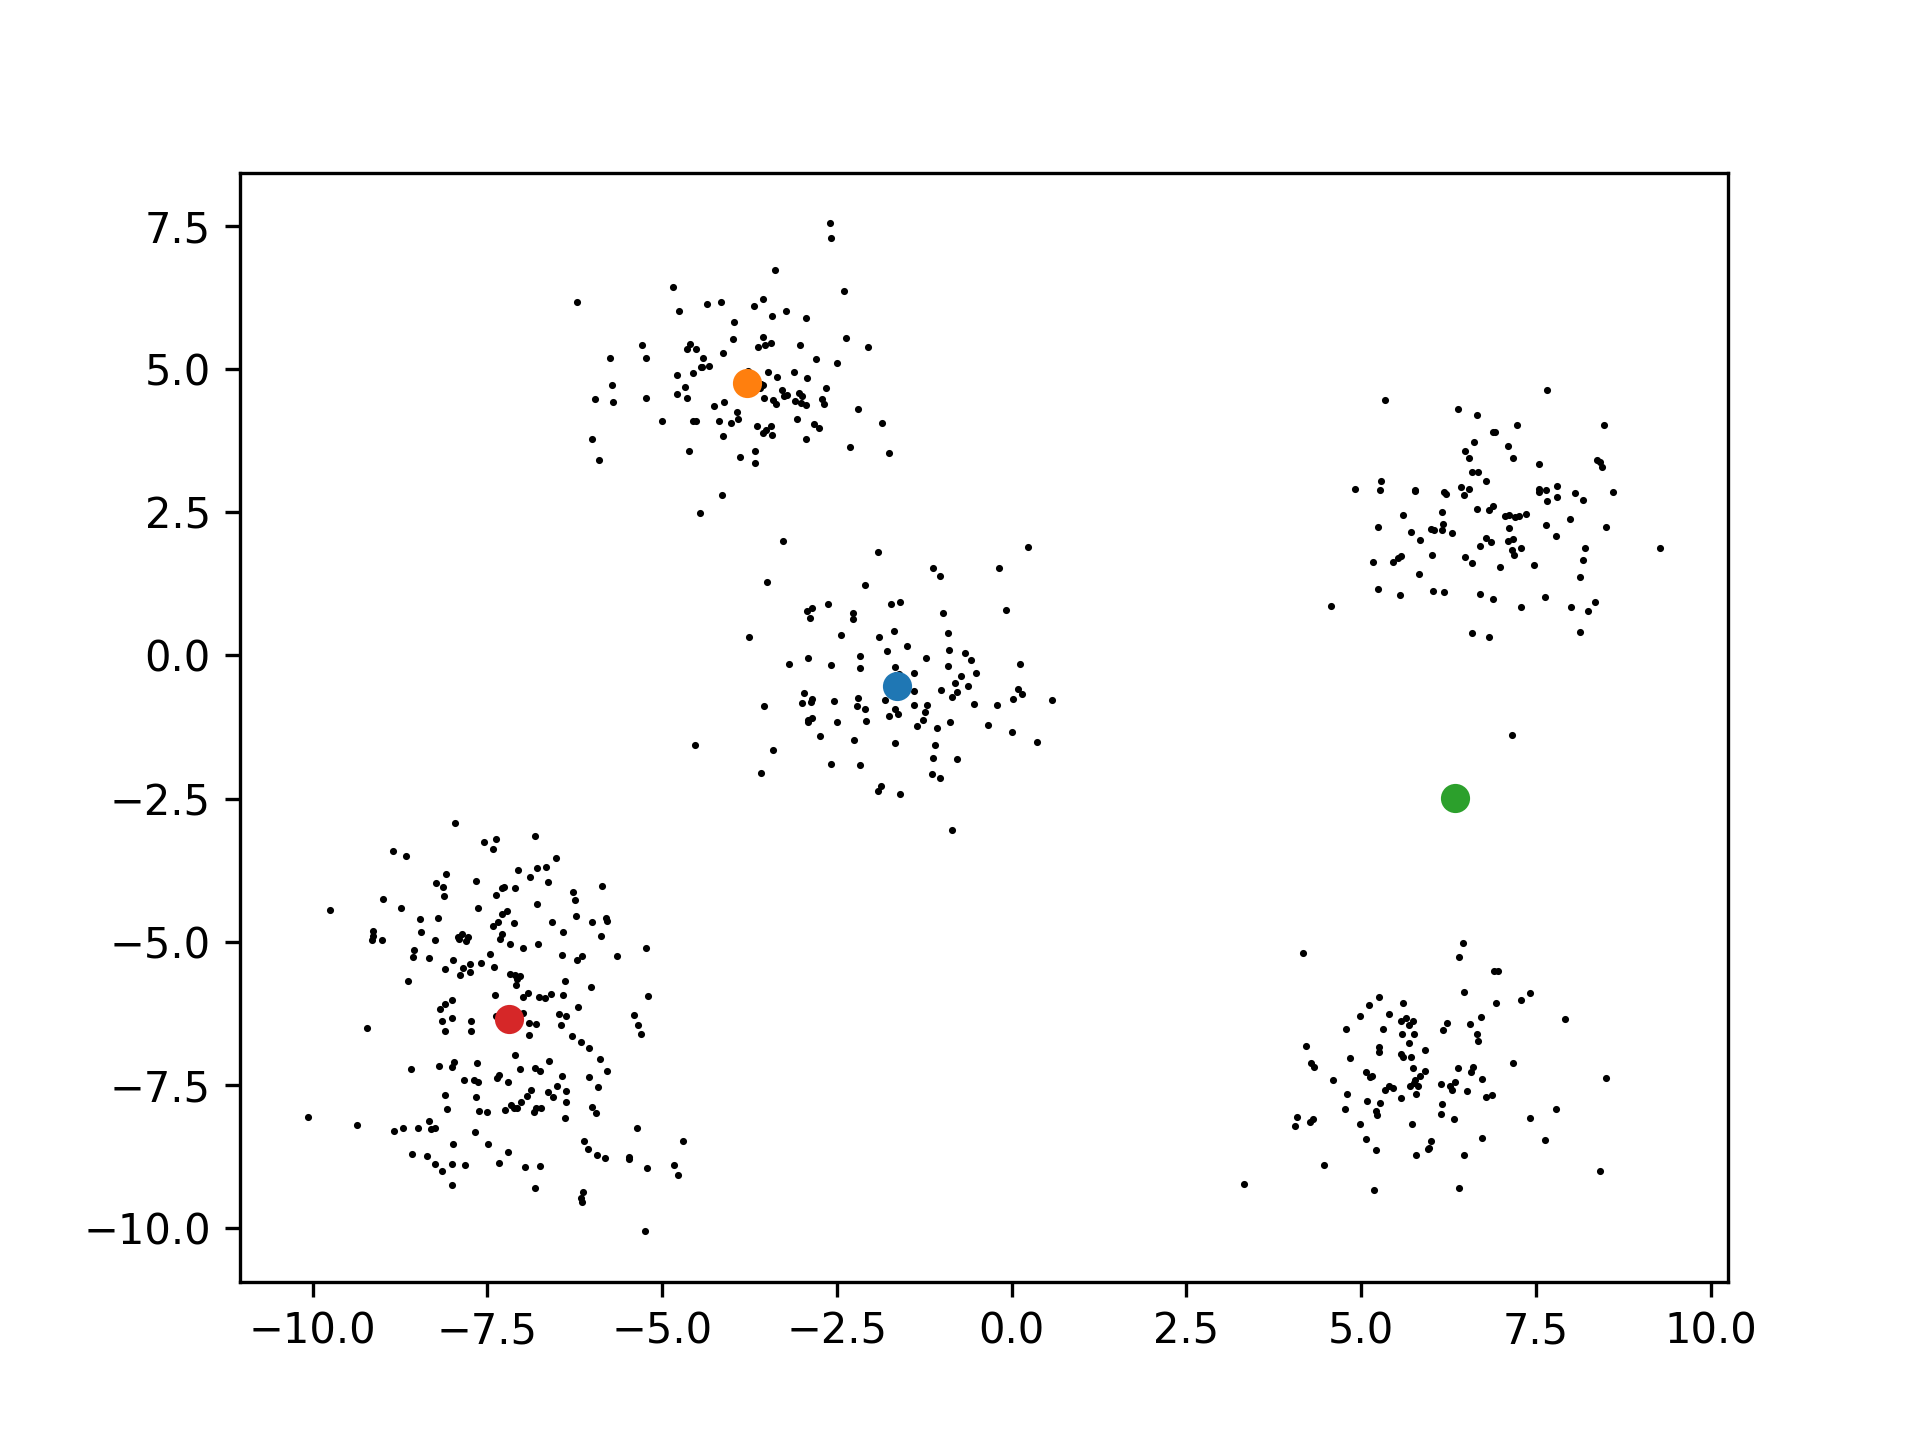

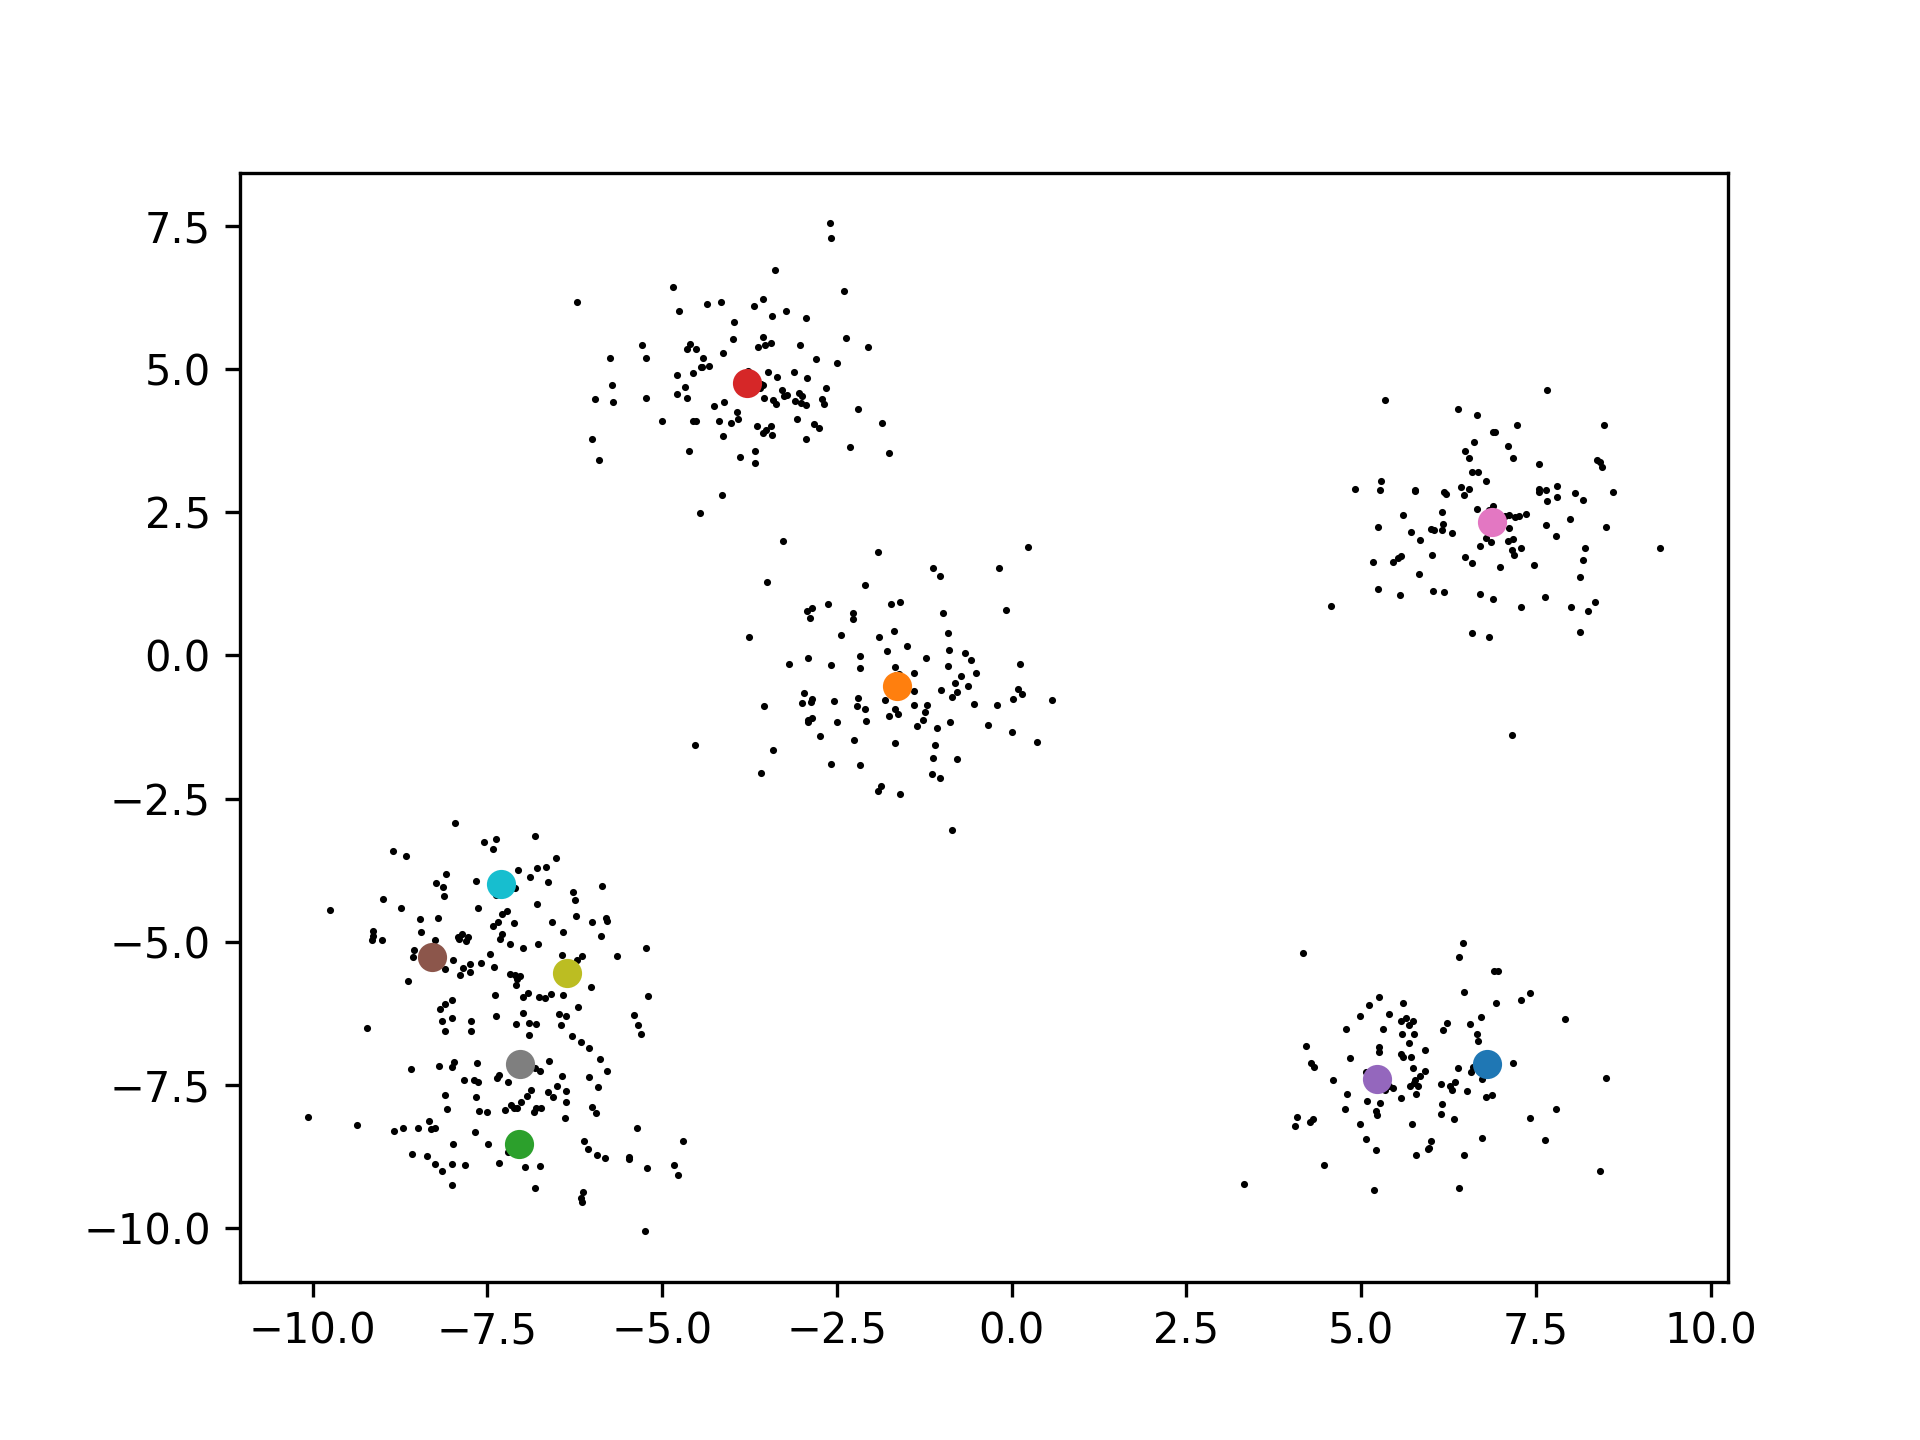

### 3. Terrible performance on skewed/elongated data:

The algorithm works well on spheroidally-well distributed data. It produces weird clustering results when given skewed data. The only difference made to the generating function given in the assignment notebook, was to make the y_coords generation in a space spanned by N(0,sigma/4), instead of like x_coords where it was N(0,4sigma).

![Terrible clustering of highly skewed data.png](<attachment:Terrible clustering of highly skewed data.png>)
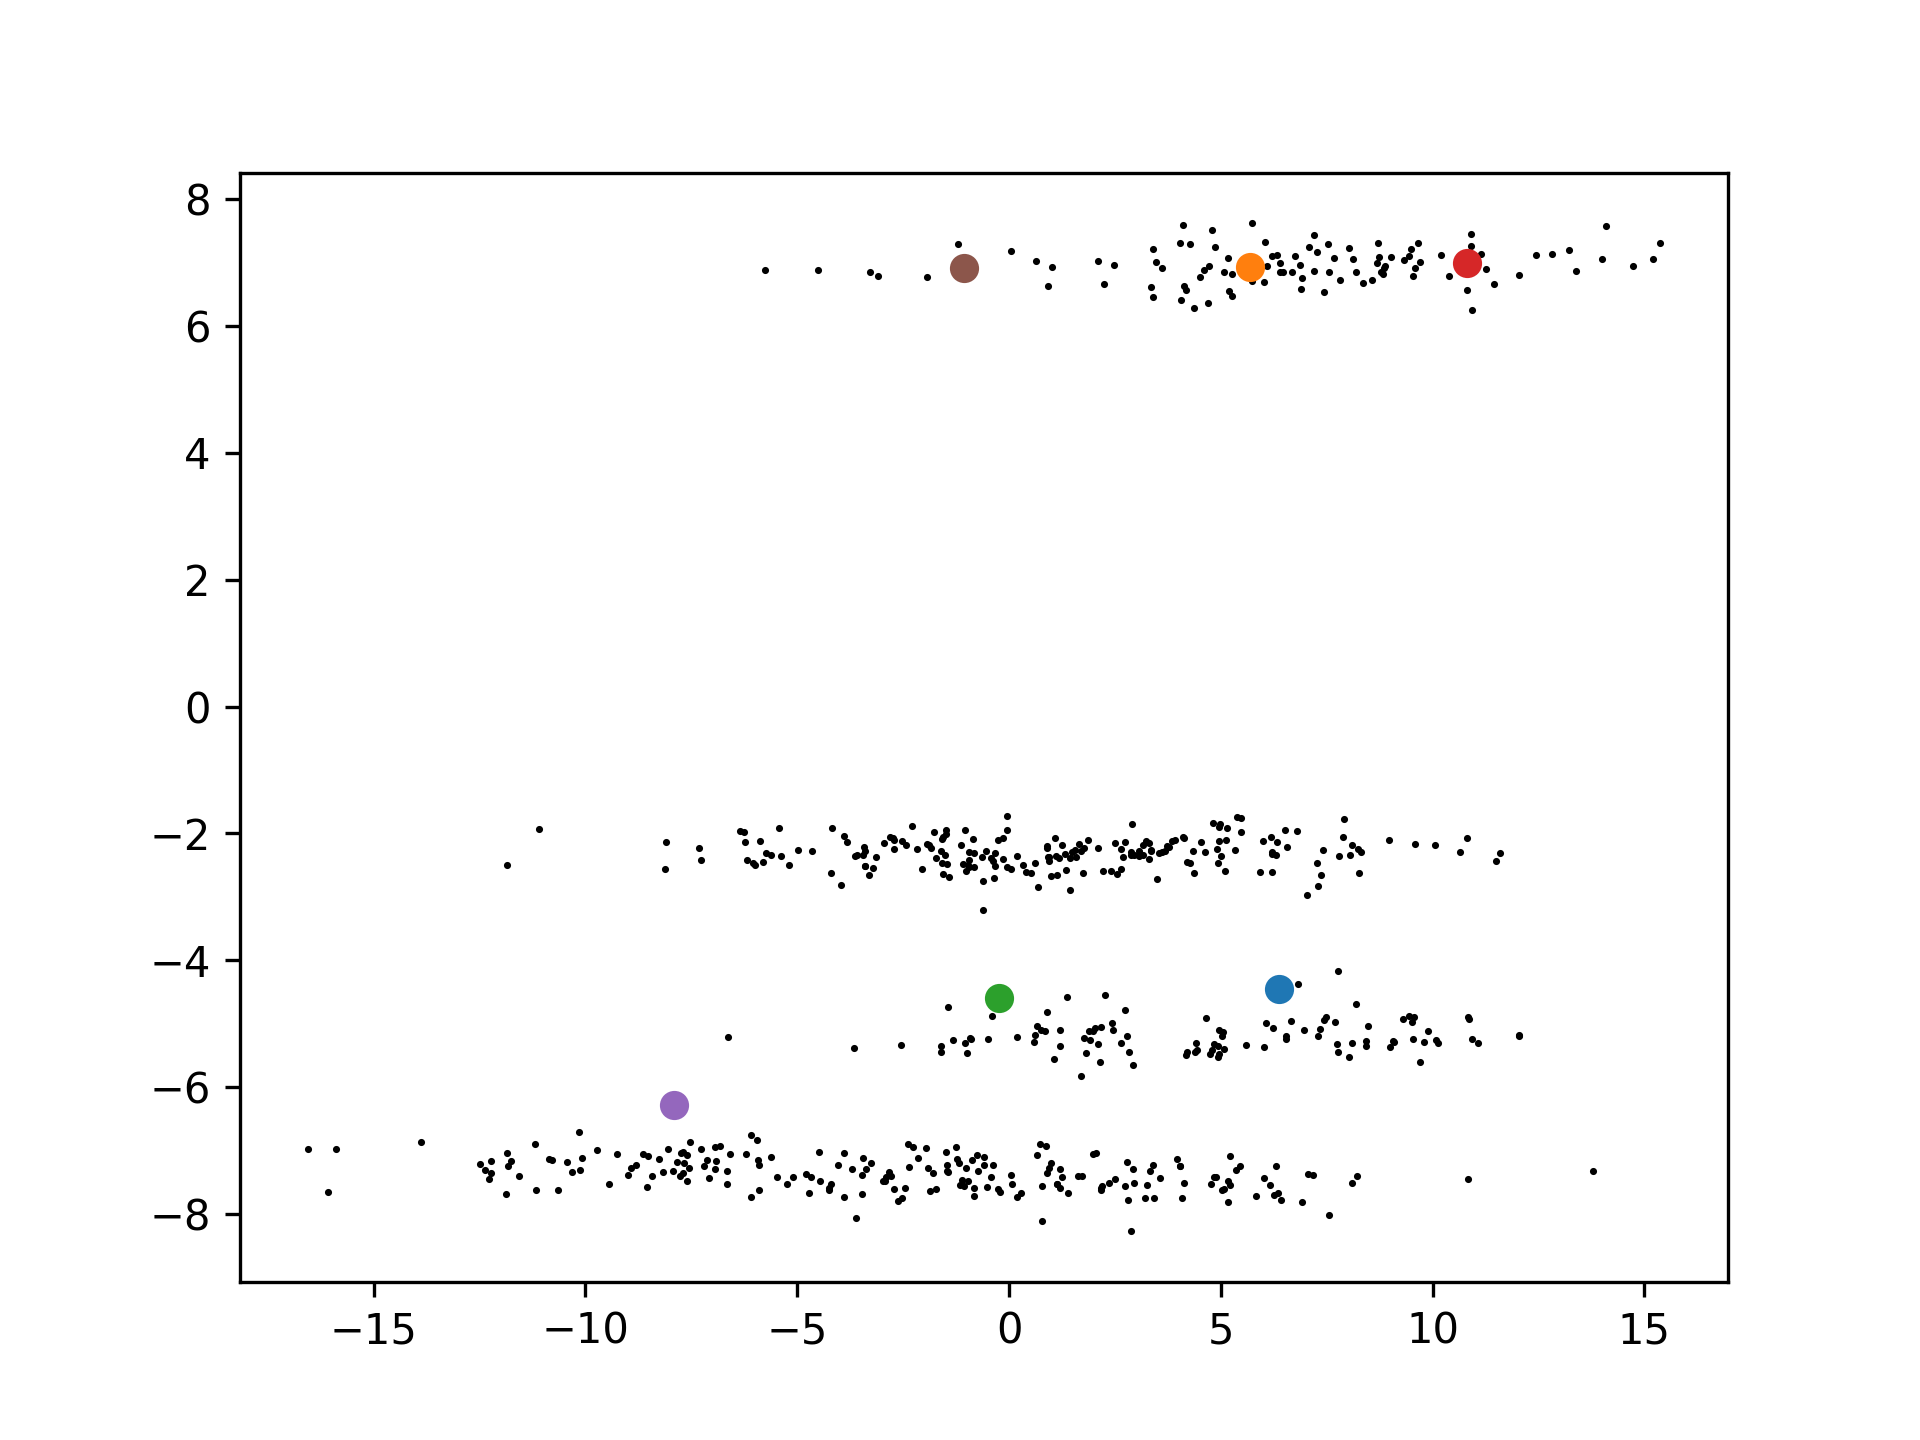

### 4. Unevenly sized clusters:

The algorithm does not look into the 'sizes' of the resulting clusters, and so, there can be clusters forming with a very significant chunk of the total set of datapoints, while other clusters have very few of the total datapoints contained in them.

![Unevenly sized clusters.png](<attachment:Unevenly sized clusters.png>)
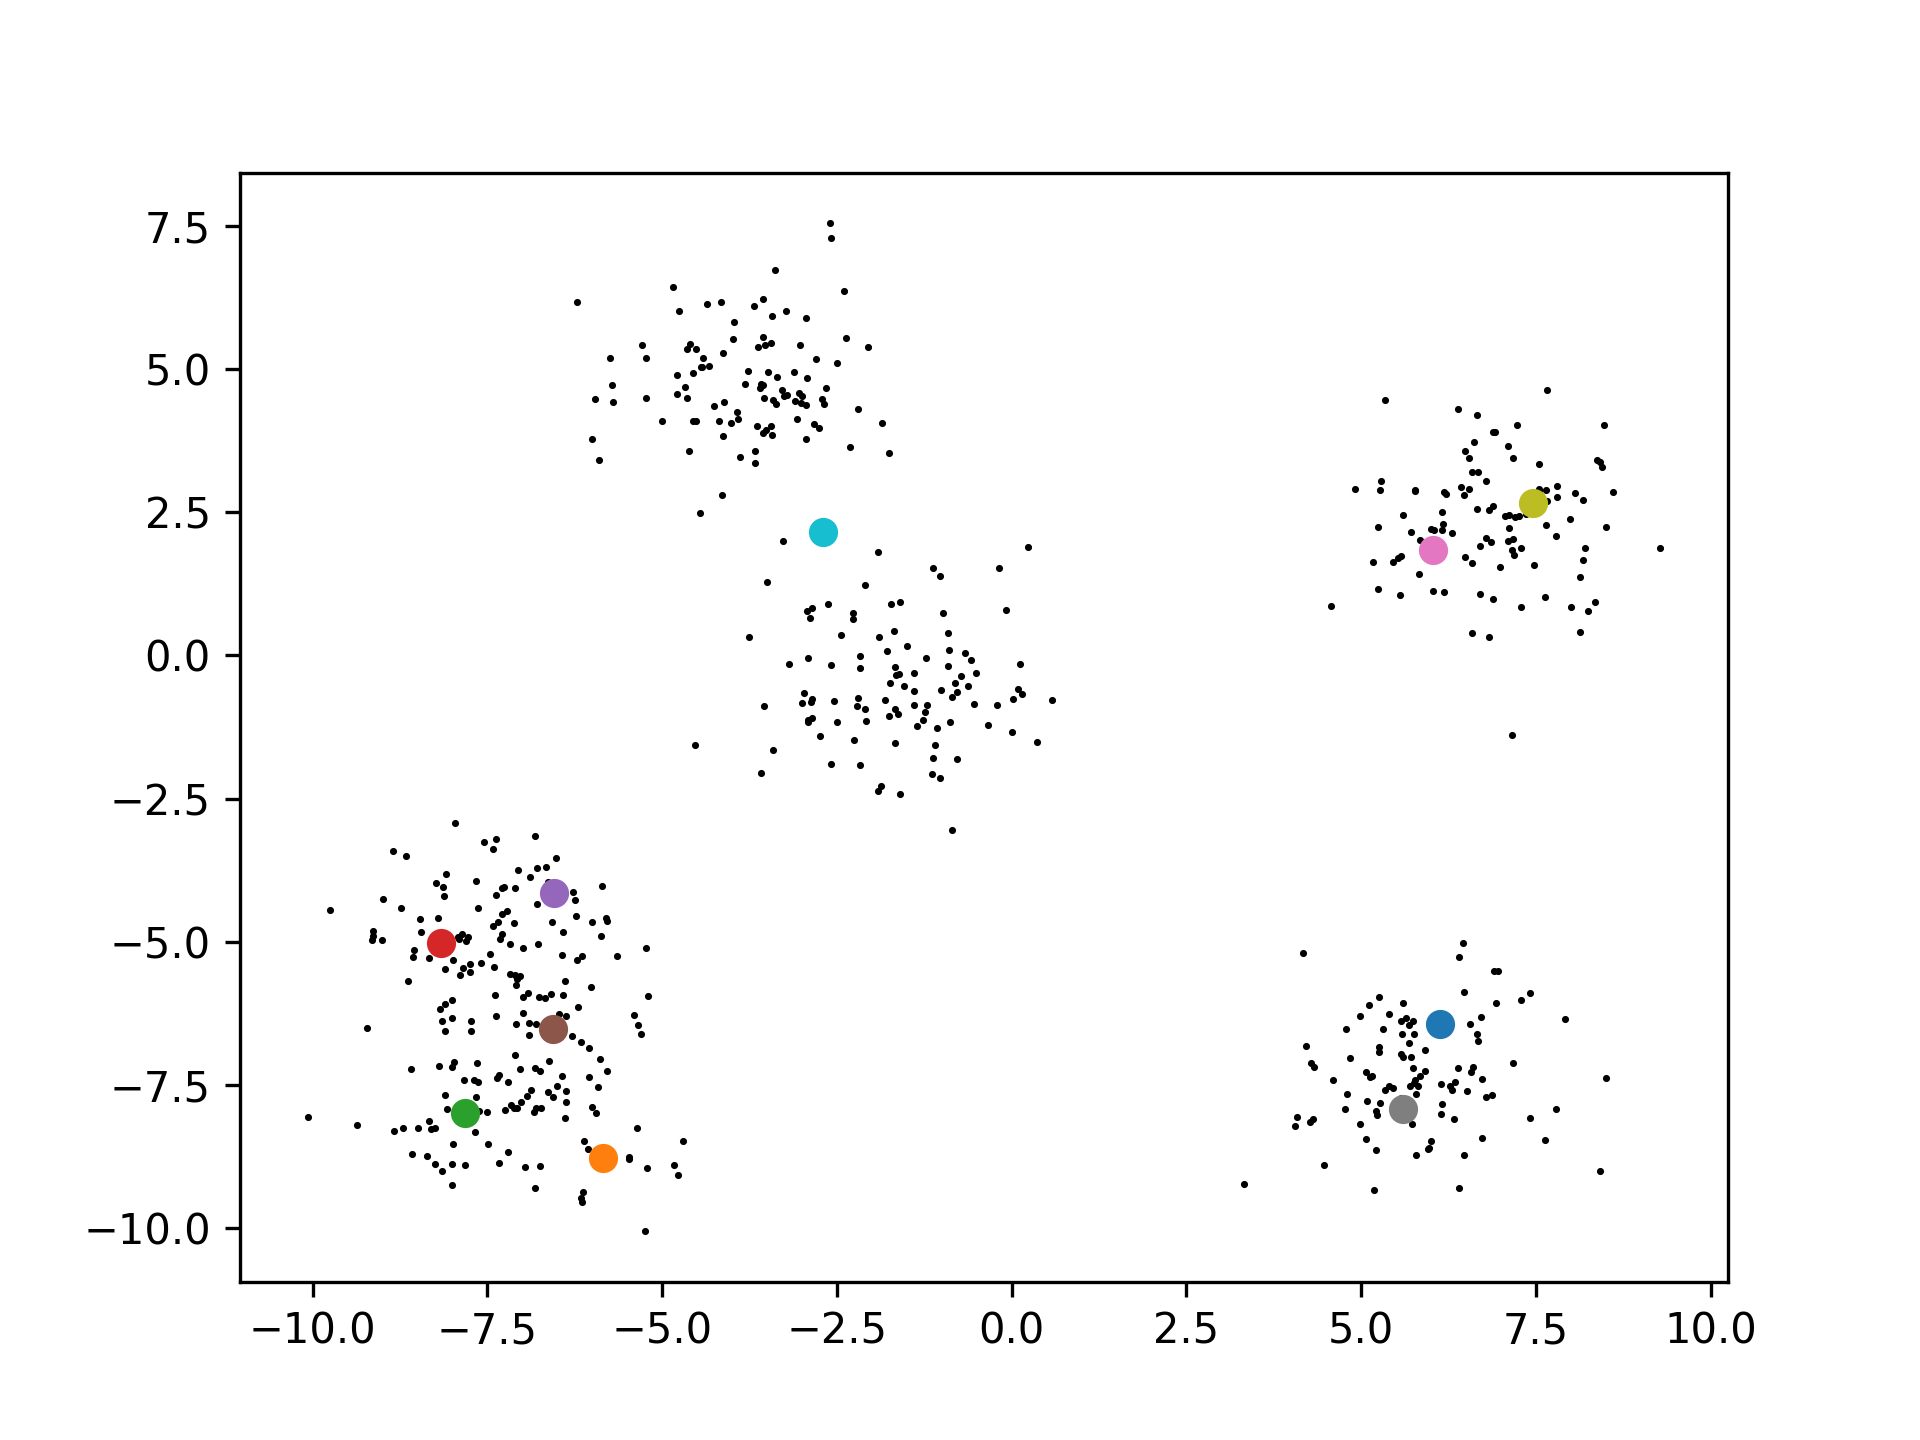